# Split waveguide
The split waveguide is a square waveguide that after a propagation distance $l_1$ splits in two square waveguides separated by an angle $\alpha$.

In [1]:
from pypropagate import *
%matplotlib inline

## Setting up the propagators
We create a settings object to store the propagator settings.

In [2]:
settings = presets.settings.create_paraxial_wave_equation_settings()

We create a settings category that stores the paramters of the split waveguide. 
This allows a more flexible simulation routines we may change the paramter values at any point before initializing a propagator. 

In [3]:
sw = settings.create_category('split_waveguide',short_name='SW')
sw.create_symbol('l_1',info='propagation length before split')
sw.create_symbol('alpha',info='separation angle')
sw.create_symbol('d',info='waveguide profile edge length')
sw.create_symbol('n_core',info='refractive index in the guiding core')
sw.create_symbol('n_cladding',info='refractive index in the cladding');

Using these paramters we define the position depenent index of refraction.

In [4]:
s = settings.symbols

settings.wave_equation.n = pc.piecewise(
    (sw.n_core,(abs(s.x)<sw.d/2) & (abs(s.y)<sw.d/2) & (s.z <= sw.l_1)), # initial channel
    (sw.n_core,(abs(s.x - pc.tan(sw.alpha) * (s.z - sw.l_1) ) < sw.d/2) & (abs(s.y)<sw.d/2) & (s.z > sw.l_1)), # upper channel
    (sw.n_core,(abs(s.x + pc.tan(sw.alpha) * (s.z - sw.l_1) ) < sw.d/2) & (abs(s.y)<sw.d/2) & (s.z > sw.l_1)), # lower channel
    (sw.n_cladding,True) # cladding
)

settings.get(settings.wave_equation.n)

piecewise(tuple(n_core_SW,(abs(tan(alpha_SW)*(z-l_1_SW)+x)<d_SW/2&abs(y)<d_SW/2&l_1_SW<z)|(abs(x)<d_SW/2&abs(y)<d_SW/2&z<=l_1_SW)|(abs(x-tan(alpha_SW)*(z-l_1_SW))<d_SW/2&abs(y)<d_SW/2&l_1_SW<z)),tuple(n_cladding_SW,True))

## Numerical values
We now set all numerical paramter values for the simulation, including the simulation box size, boundary conditions and photon energy.

In [5]:
settings.wave_equation.set_energy(12*units.keV)
presets.boundaries.set_plane_wave_initial_conditions(settings)

In [6]:
sw.n_core = 1
sw.n_cladding = presets.medium.create_material('Ti',settings)
sw.l_1 = 0.2 * units.mm
sw.d = 70 * units.nm
sw.alpha = 0.01 * units.degrees

Set a simulation box size to plot the index of refraction.

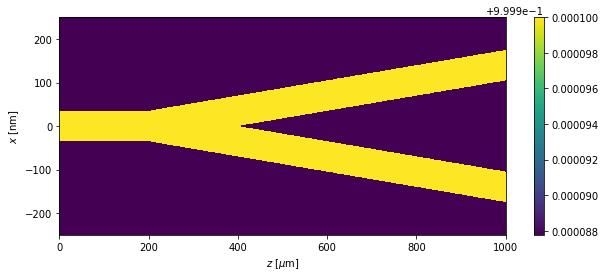

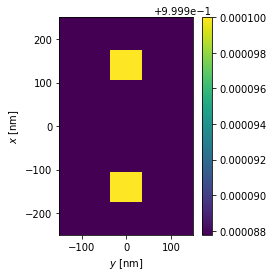

In [7]:
settings.simulation_box.set((0.5*units.um,0.3*units.um,1*units.mm),(1000,500,1000))
plot(s.n.subs(s.y,0),settings,figsize=(10,4))
plot(s.n.subs(s.z,s.zmax),settings,figsize=(3,4));

## Calculating the stationary field
We use the 2D Finite Difference Prpagator to get the full stationary solution. 
We plot a slice of the field in the $y = 0$ slice.

In [8]:
settings.simulation_box.set((0.5*units.um,0.3*units.um,1*units.mm),(1000,500,5000))

propagating:|█████████████████████| 999/999 [253.0s < 0(0)s]]


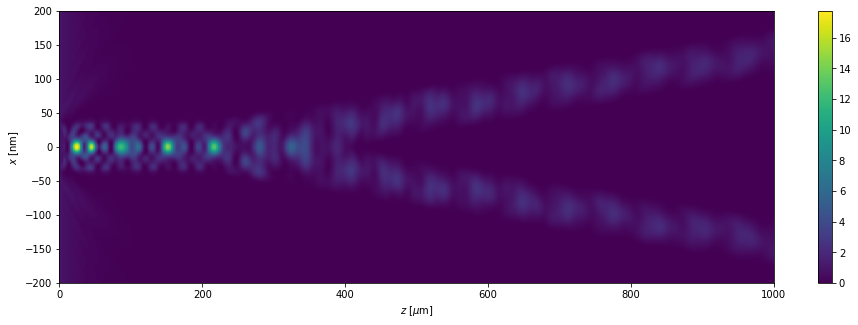

In [9]:
propagator = propagators.FiniteDifferences3D(settings)
plot(propagator.run_slice()[-0.2*units.um:0.2*units.um,0,::1*units.um],figsize=(16,5));

## Plotting the exit field

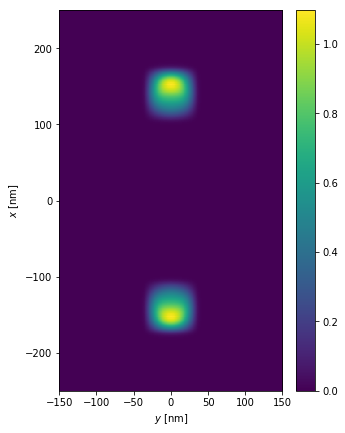

In [10]:
plot(propagator.get_field(),figsize=(5,7));